In [11]:
# Dependencies and Setup
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Data file paths
county_2015_path = "Output/2015_cleaned_all_county.csv"
state_2015_path = "Output/2015_cleaned_state.csv"
county_2017_path = "Output/2017_cleaned_all_county.csv"
state_2017_path = "Output/2017_cleaned_state.csv"

# Read 2015 and 2017 county and state CSVs
county_2015 = pd.read_csv(county_2015_path)
state_2015 = pd.read_csv(state_2015_path)
county_2017 = pd.read_csv(county_2017_path)
state_2017 = pd.read_csv(state_2017_path)

In [12]:
# Display State 2015
state_2015.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,Alabama,4830620,2341093,2489527,1.931916e+05,3.204688e+06,1270589.420,22035.628,59354.702,1095.318,...,21027.491,56291.769,25.929851,1.583343e+06,329464.275,105899.501,3741.503,910514.296,1318510.657,454469.598
1,Alaska,733375,384160,349215,4.787202e+04,4.574529e+05,23626.876,98392.144,42337.394,8648.932,...,19762.187,16095.567,11.227586,2.400757e+05,88188.949,22204.185,641.823,74625.982,99631.150,61944.137
2,Arizona,6641928,3299088,3342840,2.015063e+06,3.751936e+06,263020.036,265843.505,193808.980,11591.873,...,77260.653,156284.321,21.720000,2.230891e+06,412333.553,166408.968,5509.656,1210358.640,1724496.524,603931.233
3,Arkansas,2958208,1451913,1506295,2.032525e+05,2.177132e+06,456641.246,16567.564,39995.948,6634.705,...,15621.943,40293.077,23.168000,9.696665e+05,205375.413,78649.194,2429.898,571559.708,821253.302,231175.747
4,California,38421464,19087135,19334329,1.474653e+07,1.487873e+07,2157961.356,144703.993,5192711.429,133270.866,...,437405.810,917149.162,24.965517,1.340382e+07,2381748.784,1434112.661,34124.866,6260493.910,8451676.910,3845640.470


In [19]:
# Creating 2015 DF 
gender_15_state = state_2015[["State","TotalPop", "Men", "Women", "IncomePerCap"]]
gender_15_state.head()

,State,TotalPop,Men,Women,IncomePerCap
0,Alabama,4830620,2341093,2489527,20780.940299
1,Alaska,733375,384160,349215,30332.965517
2,Arizona,6641928,3299088,3342840,21052.533333
3,Arkansas,2958208,1451913,1506295,20072.026667
4,California,38421464,19087135,19334329,27902.603448


In [25]:
# Generate new DF for 2015 State to add new Percent Difference column between Men and Women. Negative numbers = more women
gender_diff_prcnt_state_15 = (gender_15_state["Men"] - gender_15_state["Women"]) / gender_15_state["TotalPop"] * 100
gender_15_state['PercentDiff'] = gender_diff_prcnt_state_15
gender_15_state.head()

C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,TotalPop,Men,Women,IncomePerCap,PercentDiff
0,Alabama,4830620,2341093,2489527,20780.940299,-3.072773
1,Alaska,733375,384160,349215,30332.965517,4.764957
2,Arizona,6641928,3299088,3342840,21052.533333,-0.658724
3,Arkansas,2958208,1451913,1506295,20072.026667,-1.838343
4,California,38421464,19087135,19334329,27902.603448,-0.643375


In [39]:
women_dom_2015 = gender_15_state.loc[gender_15_state['PercentDiff']<0]
women_dom_2015.head()

,State,TotalPop,Men,Women,IncomePerCap,PercentDiff
0,Alabama,4830620,2341093,2489527,20780.940299,-3.072773
2,Arizona,6641928,3299088,3342840,21052.533333,-0.658724
3,Arkansas,2958208,1451913,1506295,20072.026667,-1.838343
4,California,38421464,19087135,19334329,27902.603448,-0.643375
6,Connecticut,3593222,1751607,1841615,37025.125000,-2.504938


In [28]:
men_dom_2015 = gender_15_state.loc[gender_15_state['PercentDiff']>0]
men_dom_2015

,State,TotalPop,Men,Women,IncomePerCap,PercentDiff
1,Alaska,733375,384160,349215,30332.965517,4.764957
5,Colorado,5278906,2648667,2630239,27747.250000,0.349087
11,Hawaii,1406299,709871,696428,31892.600000,0.955913
12,Idaho,1616547,810464,806083,21451.113636,0.271010
26,Montana,1014699,510163,504536,25020.678571,0.554549
28,Nevada,2798636,1407735,1390901,26317.705882,0.601507
34,North Dakota,721640,367963,353677,31900.509434,1.979657
42,South Dakota,843190,423477,419713,25334.893939,0.446400
45,Utah,2903379,1459229,1444150,22552.241379,0.519360
51,Wyoming,579679,295561,284118,29223.652174,1.974024


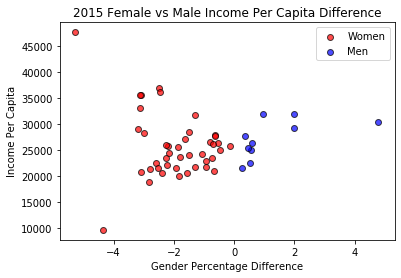

In [38]:
women_percent_diff_2015 = women_dom_2015["PercentDiff"]
women_IPC_2015 = women_dom_2015["IncomePerCap"]
men_percent_diff_2015 = men_dom_2015["PercentDiff"]
men_IPC_2015 = men_dom_2015["IncomePerCap"]
plt.scatter(women_percent_diff_2015, women_IPC_2015, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Women")
plt.scatter(men_percent_diff_2015, men_IPC_2015, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Men")
plt.legend(loc="best")
plt.xlabel("Gender Percentage Difference")
plt.ylabel("Income Per Capita")
plt.title("2015 Female vs Male Income Per Capita Difference")

plt.show()